## Exploratory Data Analysis - Automobile (Part 2: Data Analysis)

<img width="600" height="400" style="float: left;" src="Images/EDA_Automobile_Banner.jpg">

### 1. About data

<b>Contents:</b> Insurance risk symboling and normalized loss for each model, along with body and engine
specifications, and price.

#### Importing packages    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline


In [2]:
# Read data from CSV file
df=pd.read_csv("data/Automobile_data_cleaned.csv")

### 2. Data validation

In [3]:
df.shape

(183, 32)

In [4]:
# !pip install tabulate

In [353]:
# from tabulate import tabulate
# print(tabulate(df[["make","body-style","engine_size_cc","symboling","price"]].head(10), headers='keys', tablefmt='psql'))

<b> Created "avg-mpg" new column which represent the mean value of highway and city mileage.  </b>

In [6]:
df['avg-mpg'] = (df['highway-mpg'] + df['city-mpg']) / 2
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky,avg-mpg
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,24,30,13950.0,4,4,1786,0.043646,risky,1,27.0
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,18,22,17450.0,4,5,2228,0.040722,risky,1,20.0


### 3. Data analysis

### 3.1. Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

<b>Color codes: </b>

<img width="800" height="600" style="float: left;" src="Images/Color_codes.png">

<b> Set some global values for graph preparion, which will give unique look throughout the project. </b>

In [176]:
title_color = "navy"
plot_color = "crimson"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

#### 3.1.1 Vehicle make frequency diagram

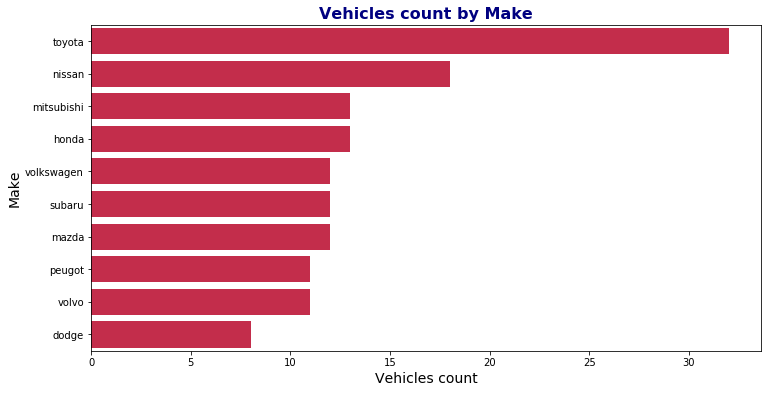

In [9]:
fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Vehicles count by Make", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = df["make"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["make"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Make',fontsize=14 )
symbol_dist.set_xlabel('Vehicles count',fontsize=14)
xticks(rotation=0)

fig.savefig('Images/make_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.2 Insurance risk ratings Histogram

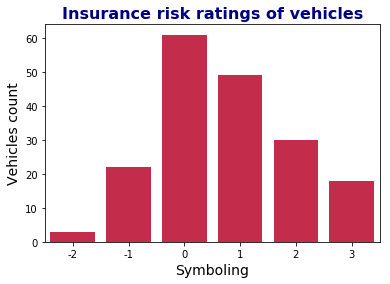

In [313]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Insurance risk ratings of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["symboling"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Symboling',fontsize=14)

fig.savefig('Images/symboling_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.3 Normalized losses histogram

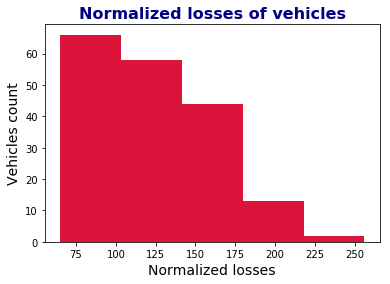

In [11]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Normalized losses of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['normalized-losses'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Normalized losses',fontsize=14)

fig.savefig('Images/normalized-losses_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.4 Horse power histogram

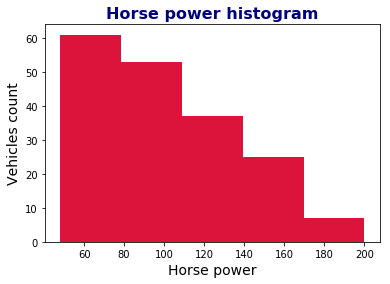

In [12]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Horse power histogram", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['horsepower'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Horse power',fontsize=14)

fig.savefig('Images/horsepower_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.5 Fuel type distribution

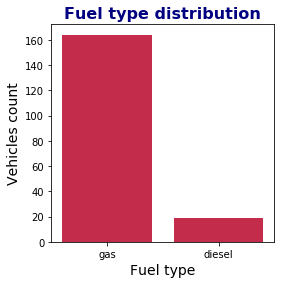

In [13]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["fuel-type"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type',fontsize=14)

fig.savefig('Images/fuel_type_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.6 Fuel type (aspiration) distribution

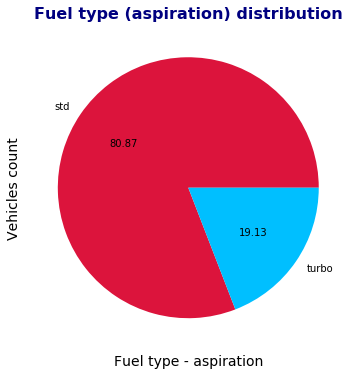

In [14]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type (aspiration) distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f', colors=[plot_color, plot_color_secondary])
#symbol_dist = sns.countplot(df["aspiration"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type - aspiration',fontsize=14)

fig.savefig('Images/fuel_type_aspiration_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.7 Curb weight distribution

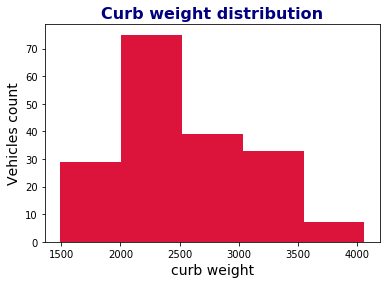

In [15]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Curb weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['curb-weight'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('curb weight',fontsize=14)

fig.savefig('Images/curb_weight_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.8 Drive wheels distribution

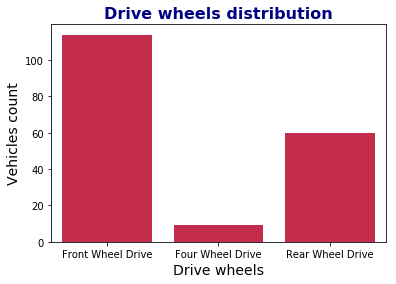

In [16]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Drive wheels distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["drive-wheels"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Drive wheels',fontsize=14)

fig.savefig('Images/drive-wheels_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.9 Number of doors distribution

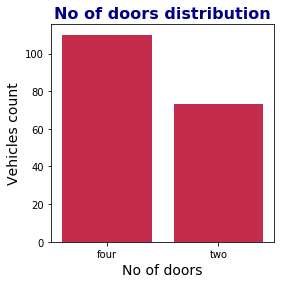

In [17]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("No of doors distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["num-of-doors"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('No of doors',fontsize=14)

fig.savefig('Images/num_of_doors_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.10 Body-style distribution

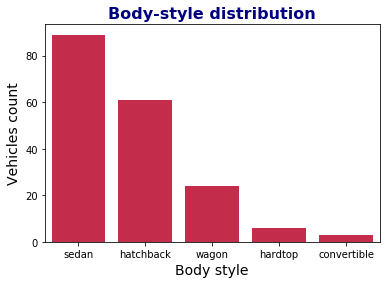

In [18]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Body-style distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

top_5_body_style = df["body-style"].value_counts()[:5].to_frame().reset_index()
symbol_dist = sns.barplot(data=top_5_body_style, color=plot_color, x="index", y="body-style", ax=ax)

symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Body style',fontsize=14)

fig.savefig('Images/body_style_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.11 Num-of-cylinders distribution

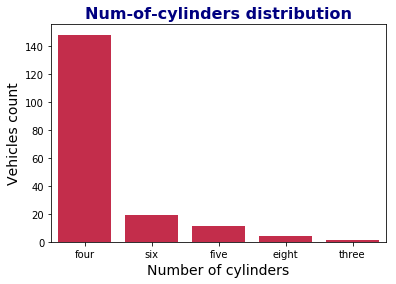

In [19]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Num-of-cylinders distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")

df_cylinders = df["num-of-cylinders"].value_counts()[:8].to_frame().reset_index()
symbol_dist = sns.barplot(data=df_cylinders, color=plot_color, x="index", y="num-of-cylinders", ax=ax)

symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Number of cylinders',fontsize=14)

fig.savefig('Images/num_of_cylinders_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 3.1.12 Let us see the distribution of some key attributes of the cars.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


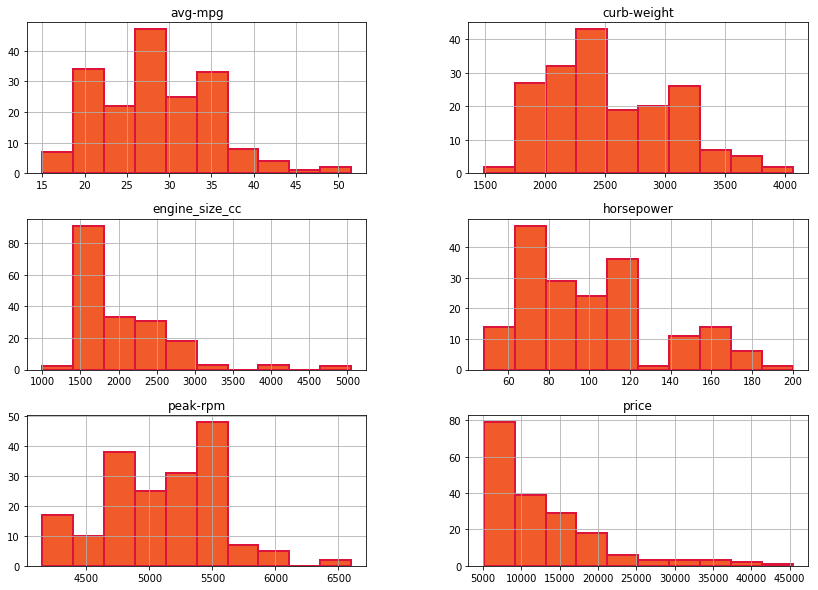

In [20]:
fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

df[['engine_size_cc','peak-rpm','curb-weight','horsepower', 'avg-mpg', 'price']].hist(color='#F15B2A', ax=ax, edgecolor=plot_color, linewidth=2)
plt.show()

fig.savefig('Images/cars_group_hist.png',dpi=fig.dpi,bbox_inches='tight')

In [21]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky,avg-mpg
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,24,30,13950.0,4,4,1786,0.043646,risky,1,27.0
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,18,22,17450.0,4,5,2228,0.040722,risky,1,20.0


#### 3.1.13 Vichles count by brand and models.

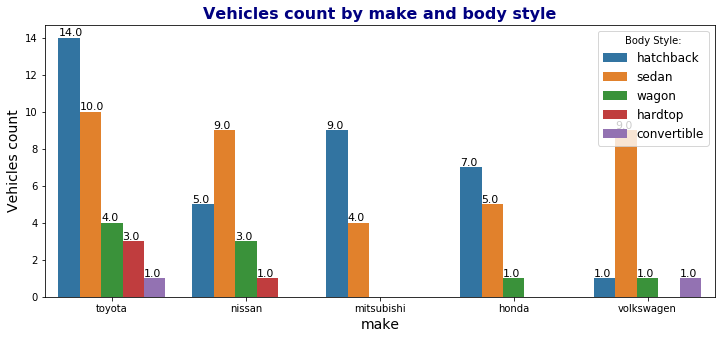

In [22]:
top_5_makers = df["make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(12,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Vehicles count by make and body style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
symbol_dist = sns.countplot(data=df[df.make.isin(maker_cols)], order=maker_cols, x="make", hue="body-style", ax=ax)

symbol_dist.set_ylabel('Vehicles count', fontsize=14 )
symbol_dist.set_xlabel('make', fontsize=14)
symbol_dist.legend(title="Body Style:", loc="upper right", fontsize="12")

for p in symbol_dist.patches:
    symbol_dist.annotate(format(p.get_height()), (p.get_x(), p.get_height()), fontsize=11, ha='left', va='bottom')

<b>Findings:</b><br />
We have taken some key features of the automobile dataset for this analysis and below are our findings.

* <b>Toyota</b> is the make of the car which has most number of vehicles with around <b>20%</b> than the 2nd highest Nissan

* Most preferred fuel type for the customer is standard vs trubo having more than <b>80%</b> of the choice.

* Most preferred <b>body-style</b> is sedan cars around 50% out of total cars. 

* 80% cars are <b>four</b> cylinders based.

* For drive wheels, <b>front wheel drive</b> has most number of cars followed by rear wheel and four wheel. 

* Curb weight of the cars are distributed between <b>1500 and 4000</b> approximately

* Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of <b>0 and 1</b>.

* Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between <b>65 and 150</b>.

### 3.2. Correlation Analysis


* Covariance is a measure of how much two random variables change together.
* The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized. 
* The normalized version of the covariance is called the correlation coefficient.
* The correlation matrix is a bit easier to understand, since the values are normalized. 
* The diagonal values of the correlation matrix are all 1.0, as a result of the normalization. 
* The magnitudes of the correlation values between the variables range between -1.0 and +1.0. A magnitude closer to +1.0 or -1.0 indicates a high correlation.

#### How does price vary?

* Lets study the important parameters which effect the car prices. 
* We will primarily focused horsepower,engine-size, mpg, type of car, length, width, etc. 
* Now we will explore through correlation between Price and all these fields. 

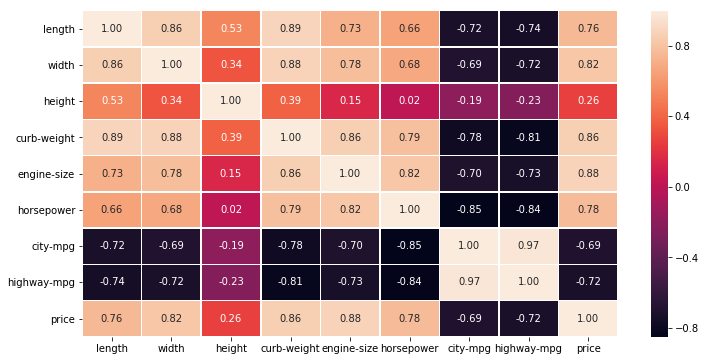

In [23]:
plt.figure(figsize=(12,6))
cols = ['length','width','height','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','price']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', linewidths=.5)

plt.savefig('Images/automobile_dataset_price_cor.png', bbox_inches='tight')

#### Findings:
We can find following correlations from above heatmap. 

* <b>Strong correlation</b>: Car price is strongly correlated with length, width, curb-weight, engine-size, horsepower. 
* <b>Strong correlation</b>: Car price is strongly correlated with city-mpg, highway-mpg. 

### 3.3. Bi-variate Analysis

Bi-variate Analysis is the simplest form of analyzing data with two variables.

##### Global utility function to create plot.

In [46]:
# sns.set_style("whitegrid")

def DrawPairPlot(dframe, kind, diag_kind, filename):
    '''
    Draw the pair plot based on the given parameters..
    '''
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color=plot_color, linewidth=1), plot_kws=dict(color=plot_color))
    plt.savefig(filename, bbox_inches='tight')
    
def DrawScatterPlot(dframe, xcol, ycol, size, plotColor, title, xlabel, ylabel, filename):
    '''
    Draw the scatter plot.
    '''
    fig, ax = plt.subplots(figsize=size, ncols=1, nrows=1) # get the figure and axes objects 

    fig.patch.set_alpha(1)
    ax.set_title(title, y = y_title_margin, fontsize=16)
    ax.patch.set_alpha(1)
    
    ax = sns.scatterplot(x=xcol, y=ycol, data=dframe, color=plotColor)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight')
    


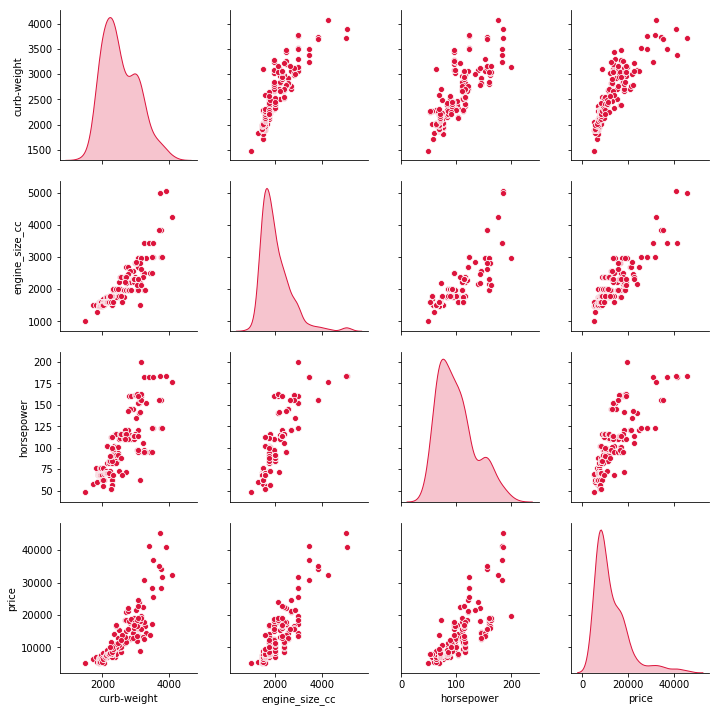

In [26]:
cols = ['curb-weight','engine_size_cc', 'horsepower','price']
filename = "Images/automobile_dataset_bodysize_pairplot.png"
DrawPairPlot(df[cols], "scatter", "kde", "body-style", filename)

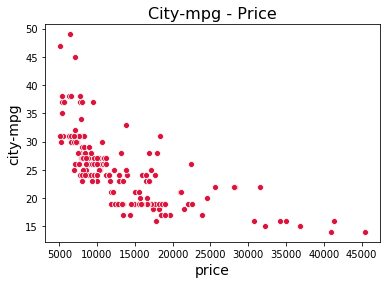

In [27]:
plot_title = "City-mpg - Price"
xlabel = "price"
yLabel = "city-mpg"
filename = "Images/automobile_dataset_citympg_price_pairplot.png"

ax = DrawScatterPlot(df, "price", "city-mpg", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

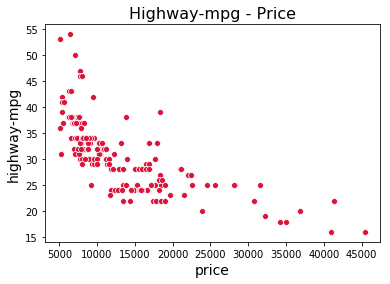

In [28]:
plot_title = "Highway-mpg - Price"
xlabel = "price"
yLabel = "highway-mpg"
filename = "Images/automobile_dataset_highwaympg_price_scatter_plot.png"

ax = DrawScatterPlot(df, "price", "highway-mpg", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

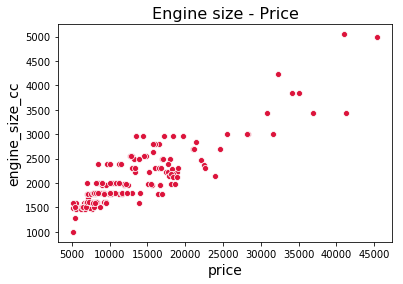

In [37]:
plot_title = "Engine size - Price"
xlabel = "price"
yLabel = "engine_size_cc"
filename = "Images/automobile_dataset_engine_price_scatter_plot_1.png"

ax = DrawScatterPlot(df, "price", "engine_size_cc", (6, 4), plot_color, plot_title, xlabel, yLabel, filename)

In [30]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_doors', 'num_cylinders', 'engine_size_cc',
       'power_to_weight_ratio', 'risky_or_safe', 'is_risky', 'avg-mpg'],
      dtype='object')

<b>Findings:</b><br />
We did analysis whether car is risky or not based on various columns on automobile dataset and below are our findings.

* Less horsepower (<130) is more risky compare to higher horsepower (>130).
* Car's horsepower below <130  and curbe-weight < 2500 is 90% risky. 
* Price below 20,000 dollars and engine cc below 3,000 is 95% risky.
* Price below 20,000 dollars and horsepower below <150 is 95% risky.

# Problem Statement:

* We will extract the meaningfull insight by exploring some hidden features from the combination of fileds.  

### Does the body size determine the car price?


In [32]:
df["price"].head(2)

0    13950.0
1    17450.0
Name: price, dtype: float64

#### Car price distribution:


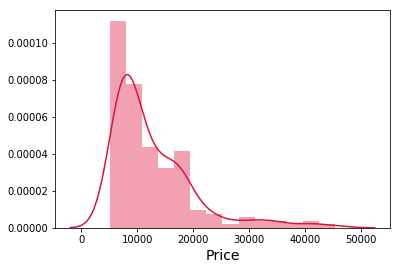

In [33]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

price_dist = sns.distplot(df["price"], hist=True, color=plot_color, ax=ax);
ax.set_xlabel('Price',fontsize=14)

fig.savefig('Images/cars_price_dist.png',dpi=fig.dpi,bbox_inches='tight')

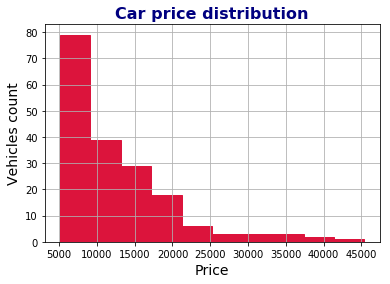

In [80]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.1)

price_dist = df[['price']].hist(color=plot_color, ax=ax, edgecolor=plot_color, linewidth=1)

ax.set_title(label="Car price distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.set_ylabel('Vehicles count',fontsize=14 )
ax.set_xlabel('Price',fontsize=14)

plt.show()

fig.savefig('Images/cars_price_hist.png',dpi=fig.dpi,bbox_inches='tight')

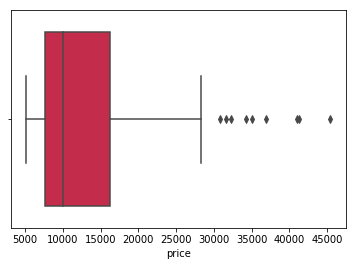

In [35]:
sns.boxplot(df['price'], color=plot_color)

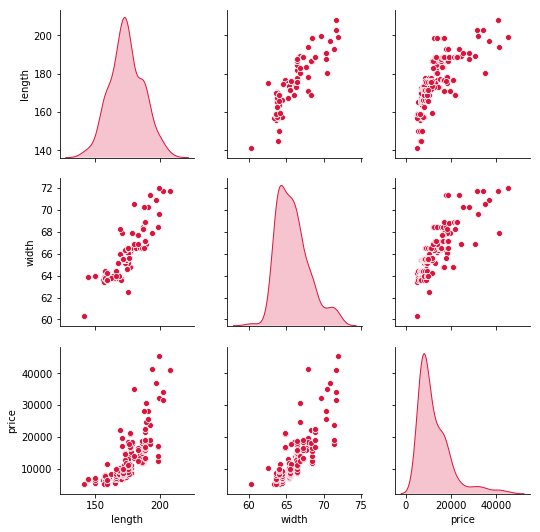

In [47]:
cols = ['length','width','price']
filename = "Images/automobile_dataset_bodysize_pairplot.png"
DrawPairPlot(df[cols], "scatter", "kde", filename)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


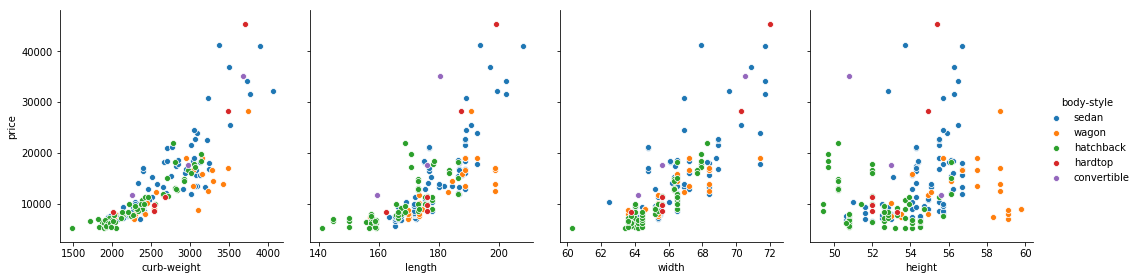

In [89]:
body_price_plot =  sns.pairplot(df, 
             size=4, aspect=0.9, 
             x_vars=['curb-weight','length','width','height'],
             y_vars=["price"], 
             kind='scatter',
             hue="body-style")

fig.savefig('Images/car_body_size_and_price_relation.png',dpi=fig.dpi,bbox_inches='tight')

The first three plots are the price of cars versus the curb weight, length and width of the cars. These seem similar and we can say that increase in length or width which also get increase of the curb weight of the car and that escalate the car price. 

Height do not have much impact on escalating the car price because it is highly distributed and not much co-relation with price.


### Does the body styles determine the car price?


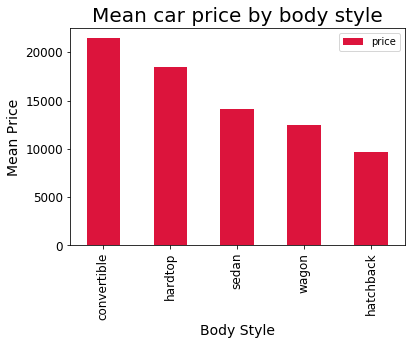

In [67]:
mean_car_prices = df.groupby(by="body-style")["price"].mean().sort_values(ascending=False).reset_index()

ax = mean_car_prices.plot.bar(
    x="body-style", 
    y="price",
    figsize=(6, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean car price by body style", fontsize=20)
ax.set_ylabel('Mean Price',fontsize=14 )
ax.set_xlabel('Body Style',fontsize=14)

plt.savefig('Images/mean_cars_price_by_body_style.png', bbox_inches='tight')

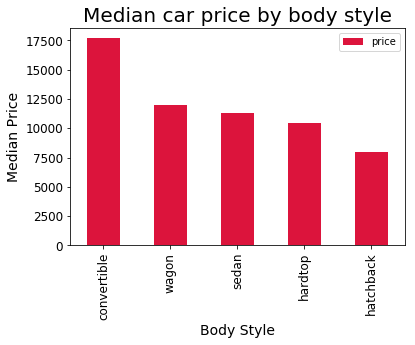

In [69]:
median_car_prices = df.groupby(by="body-style")["price"].median().sort_values(ascending=False).reset_index()

ax = median_car_prices.plot.bar(
    x="body-style", 
    y="price",
    figsize=(6, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Median car price by body style", fontsize=20)
ax.set_ylabel('Median Price',fontsize=14 )
ax.set_xlabel('Body Style',fontsize=14)

plt.savefig('Images/median_car_price_by_body_style.png', bbox_inches='tight')

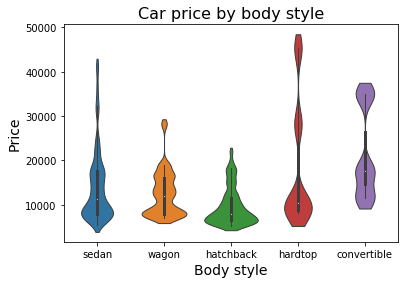

In [84]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

sns.violinplot(data=df, x="body-style", y="price", bw=.2, cut=1, linewidth=1, ax=ax)
ax.set_xlabel('Body style',fontsize=14)
ax.set_ylabel('Price', fontsize=14)

ax.set_title("Car price by body style", y = y_title_margin, fontsize=16)

fig.savefig('Images/cars_price_by_body_style_violin.png',dpi=fig.dpi,bbox_inches='tight')


### Does the engine specs determine the car price?


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


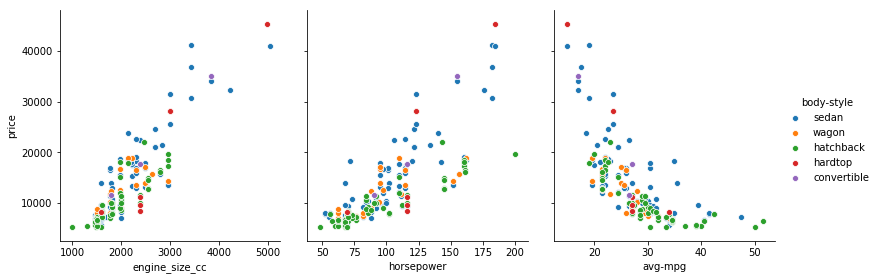

In [90]:
#fig, ax = plt.subplots(figsize=(14,4), ncols=1, nrows=1)
#fig.patch.set_alpha(0)
#ax.patch.set_alpha(0)

filename = 'Images/car_engine_specs_price_pairs.png'

body_price_plot =  sns.pairplot(df,
             size=4, aspect=0.9, 
             x_vars=['engine_size_cc', 'horsepower', 'avg-mpg'],
             y_vars=["price"], 
             kind='scatter',
             hue="body-style")

plt.savefig(filename, bbox_inches='tight')

# fig.savefig('Images/car_engine_specs_price_pairs.png', dpi=fig.dpi, bbox_inches='tight')


#### Summary:

* Bigger vehicles are priced above the smaller ones.
* Convertibles and hardtops cars are priced above the hatchback, sedan and wagon. 
* Cars having bigger engines and more horse power are priced higher. 
* Also less mileage cars are priced higher, and may be when body size and power get increase which impact to mileage and it get declined.  


### Which type of cars are better in terms of mileage?


In [92]:
df["engine_size_cc"].unique()

array([1786, 2228, 2146, 1769, 2687, 3424,  999, 1474, 1605, 1999, 2556,
       1507, 1294, 1802, 4227, 1491, 2294, 2195, 2998, 3834, 5047, 4981,
       1589, 1687, 1966, 2966, 2490, 2474, 1982, 2392, 2802, 2638, 2310,
       2130, 2834, 2376], dtype=int64)

In [93]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

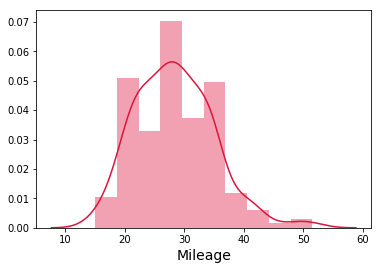

In [151]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

price_dist = sns.distplot(df["avg-mpg"], hist=True, color=plot_color, ax=ax);
ax.set_xlabel('Mileage',fontsize=14)

fig.savefig('Images/mileage_dist.png',dpi=fig.dpi,bbox_inches='tight')

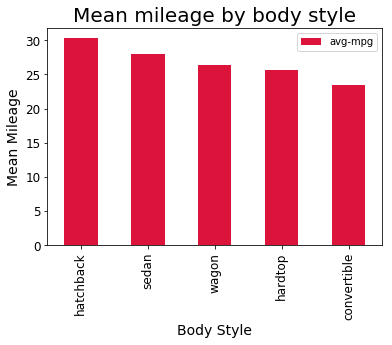

In [141]:
cars = df.groupby(by="body-style")["avg-mpg"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="body-style", 
    y="avg-mpg",
    figsize=(6, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean mileage by body style", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Body Style',fontsize=14)

plt.savefig('Images/FuelType_Avg_Milaege_BarPlot.png', bbox_inches='tight')

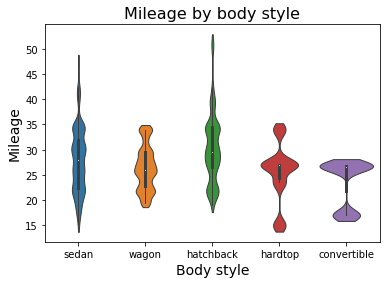

In [152]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

sns.violinplot(data=df, x="body-style", y="avg-mpg", bw=.2, cut=1, linewidth=1, ax=ax)
ax.set_xlabel('Body style',fontsize=14)
ax.set_ylabel('Mileage', fontsize=14)

ax.set_title("Mileage by body style", y = y_title_margin, fontsize=16)

fig.savefig('Images/mileage_by_body_style_violin.png',dpi=fig.dpi,bbox_inches='tight')

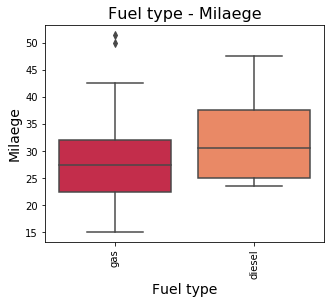

In [140]:
fig, ax = plt.subplots(figsize=(5,4), ncols=1, nrows=1) 
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type - Milaege", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax4=sns.boxplot(x="fuel-type",y="avg-mpg", data=df, palette=[plot_color, "coral"], ax=ax)

gax4.set_ylabel('Milaege',fontsize=14 )
gax4.set_xlabel('Fuel type',fontsize=14)
gax4.set_xticklabels(gax4.get_xticklabels(), rotation=90)
fig.savefig('Images/FuelType_Milaege_BoxPlot.png',dpi=fig.dpi,bbox_inches='tight')

#sns.boxplot(x="fuel-type",y="avg-mpg", data=df, palette=palette, ax=ax)

Text(0.5, 0, 'Fuel type')

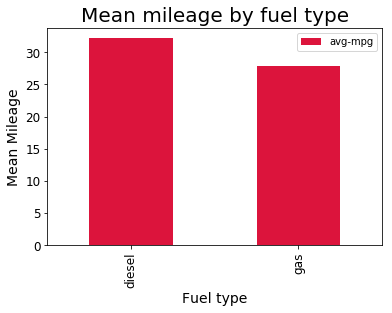

In [112]:
cars = df.groupby(by="fuel-type")["avg-mpg"].mean().sort_values(ascending=False).reset_index()

ax = cars.plot.bar(
    x="fuel-type", 
    y="avg-mpg",
    figsize=(6, 4),
    color=plot_color,
    fontsize=12
)

ax.set_title("Mean mileage by fuel type", fontsize=20)
ax.set_ylabel('Mean Mileage',fontsize=14 )
ax.set_xlabel('Fuel type',fontsize=14)

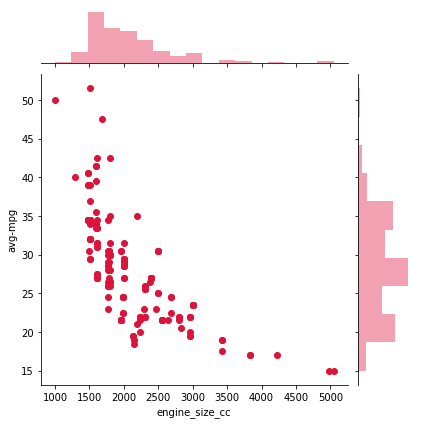

In [149]:
sns.jointplot(x='engine_size_cc', y='avg-mpg', color=plot_color, data=df)


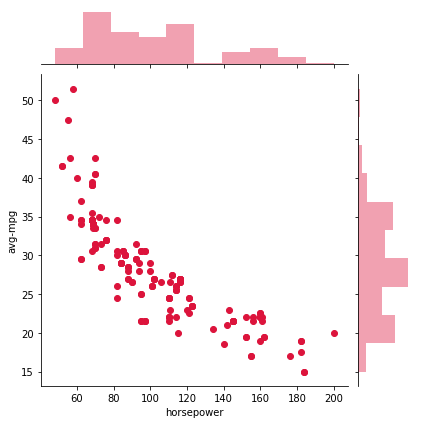

In [153]:
sns.jointplot(x='horsepower', y='avg-mpg', color=plot_color, data=df)

#### Summary:

* Hatchback and sedan cars produce better mileage.
* Cars having smaller engines and less horse power produce better mileage. 
* Diesel cars produce better mileage compare to cars with Gas fuel type.  

### Which are highest selling cars based on brand, body style and price slab?

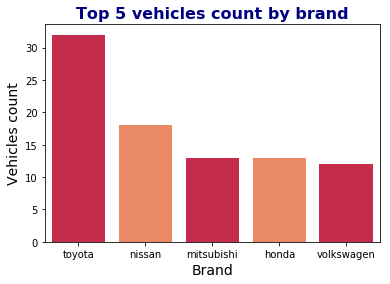

In [177]:
top_5_makers = df["make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Top 5 vehicles count by brand", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=df[df.make.isin(maker_cols)], order=maker_cols, x="make", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Brand', fontsize=14)
fig.savefig('Images/top_5_cars_by_brand_bar.png',dpi=fig.dpi,bbox_inches='tight')

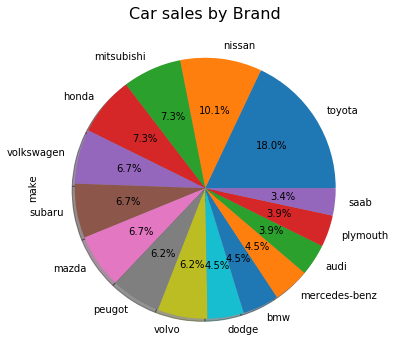

In [262]:
df["make"].value_counts()[:15].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6))
plt.title('Car sales by Brand', fontsize=16)

plt.savefig('Images/cars_sales_by_brand_pie.png', bbox_inches='tight')

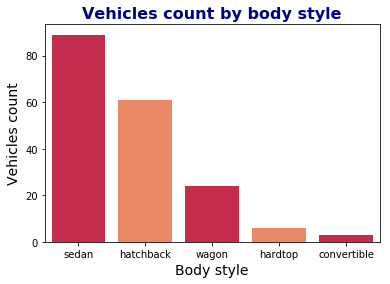

In [178]:
top_5_body_style = df["body-style"].value_counts().to_frame().reset_index()
maker_cols = top_5_body_style["index"].tolist()

fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Vehicles count by body style", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=df[df["body-style"].isin(maker_cols)], order=maker_cols, x="body-style", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Body style', fontsize=14)

fig.savefig('Images/top_5_cars_by_body_style_bar.png',dpi=fig.dpi,bbox_inches='tight')

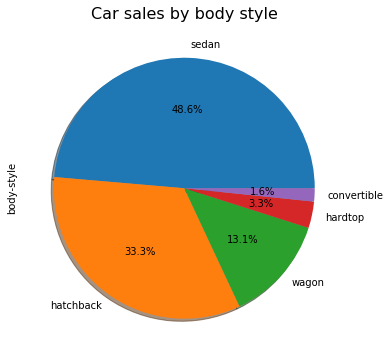

In [261]:
df["body-style"].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6))
plt.title('Car sales by body style', fontsize=16)

plt.savefig('Images/cars_sales_by_body_style_pie.png', bbox_inches='tight')

Text(0.5, 0, 'curb weight')

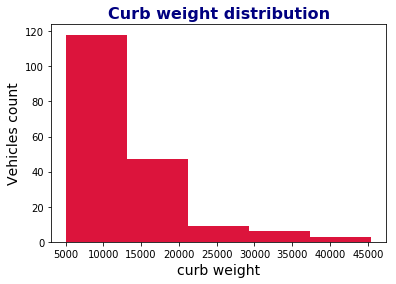

In [204]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Curb weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['price'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('curb weight',fontsize=14)

#fig.savefig('Images/curb_weight_dist.png',dpi=fig.dpi,bbox_inches='tight')

In [215]:
# sns.scatterplot(x="engine_size_cc", y="price", data=df, hue="body-style")

In [205]:
cars = df

In [219]:
cars["price-slab"] = np.where(cars["price"] <= 10000, "0-10000", np.NAN)
cars["price-slab"] = np.where((cars["price"] > 10000) & (cars["price"] <= 20000), "10000-20000", cars["price-slab"])
cars["price-slab"] = np.where((cars["price"] > 20000) & (cars["price"] <= 30000), "20000-30000", cars["price-slab"])
cars["price-slab"] = np.where((cars["price"] > 30000) & (cars["price"] <= 40000), "30000-40000", cars["price-slab"])
cars["price-slab"] = np.where((cars["price"] > 40000) & (cars["price"] <= 50000), "40000-50000", cars["price-slab"])


In [239]:
cars_by_price_slab = cars.pivot_table(index='price-slab', values='price', aggfunc='count').fillna(0)
cars_by_price_slab.reset_index(inplace=True)
cars_by_price_slab["cars-count"] = cars_by_price_slab["price"]
cars_by_price_slab.drop("price", axis=1, inplace=True)
cars_by_price_slab

,price-slab,cars-count
0,0-10000,94
1,10000-20000,69
2,20000-30000,11
3,30000-40000,6
4,40000-50000,3


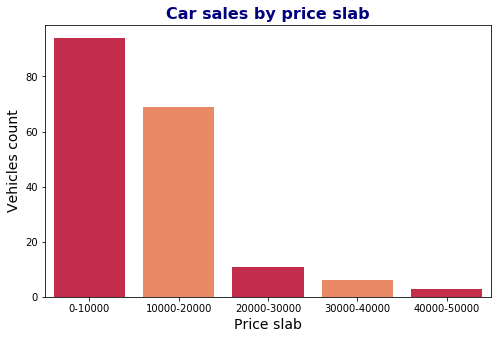

In [243]:
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Car sales by price slab", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.barplot(data=cars_by_price_slab, x="price-slab", y="cars-count", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Price slab', fontsize=14)

fig.savefig('Images/car_sales_by_price_slab.png',dpi=fig.dpi,bbox_inches='tight')

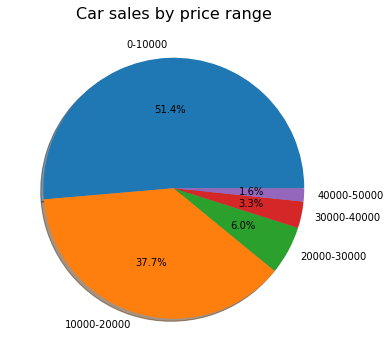

In [259]:
# cars_by_price_slab.plot(kind='pie', x="price-slab", y="cars-count", labels=activities, autopct='%1.1f%%', legend=False, shadow=True, figsize=(6,6))
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
plt.pie(cars_by_price_slab['cars-count'],
        labels=cars_by_price_slab['price-slab'],
        shadow= True,
        autopct='%1.1f%%')

plt.title('Car sales by price range', fontsize=16)

plt.savefig('Images/cars_sales_by_price_range_pie.png', bbox_inches='tight')

#### Summary:

* Toyota sells highest number of cars followed by Nissan in brand category.
* Sedan segment sells highest number of cars with 48%  followed by hatchback.
* Cars under 10k lead the list with highest number of selling followed by Cars in between $10k to $20k on price range basis.

### Which are highest normalized loss reported cars based on body style and no of doors?

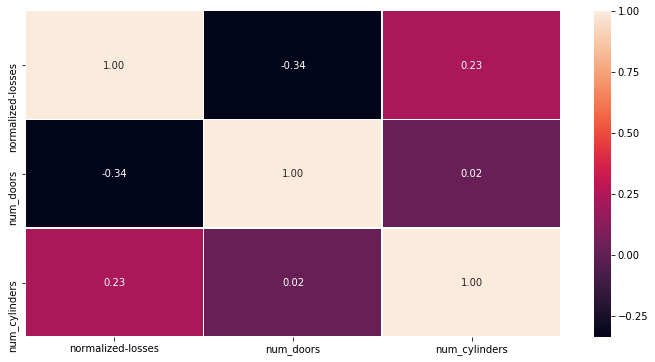

In [301]:
plt.figure(figsize=(12,6))
#cars = df[df["num_doors"] == 4]
cols = ['normalized-losses','num_doors', 'num_cylinders']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', linewidths=.5)

# plt.savefig('Images/automobile_dataset_price_cor.png', bbox_inches='tight')

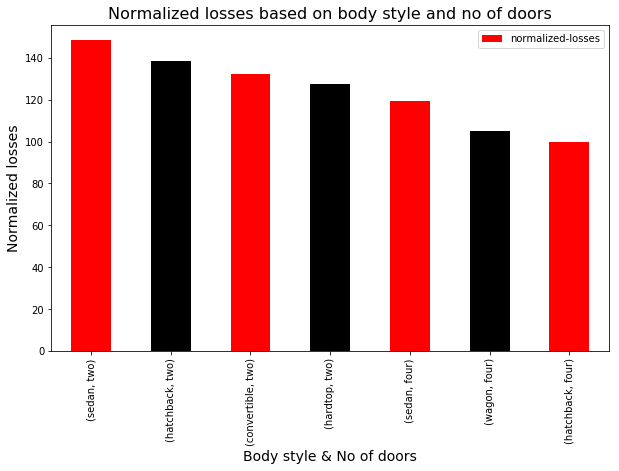

In [304]:
cars = pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').sort_values(by=['normalized-losses'], ascending=False)
cars.plot.bar(color="rk", figsize=(10,6))
plt.title("Normalized losses based on body style and no of doors", fontsize=16)
plt.ylabel('Normalized losses', fontsize=14)
plt.xlabel('Body style & No of doors', fontsize=14);

plt.savefig('Images/Normalized_losses_by_bodystyle_noofdoors.png', bbox_inches='tight')

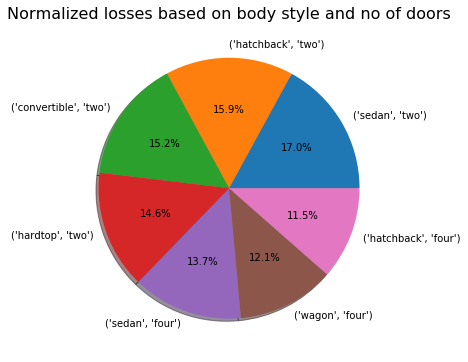

In [307]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
plt.pie(cars['normalized-losses'],
        labels=cars.index,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Normalized losses based on body style and no of doors', fontsize=16)
plt.savefig('Images/normal_losses_by_bodystyle_noofdoor_pie.png', bbox_inches='tight')

#### Summary:

* Sedan with two doors cars reported highest normalized losses followed by hatchback with two doors cars.
* Two doors cars has more number of losses than the four door cars.

### Does body size influence symboling?

Text(0.5, 0, 'Symboling')

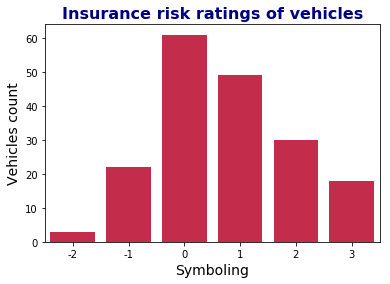

In [314]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Insurance risk ratings of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["symboling"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Symboling',fontsize=14)

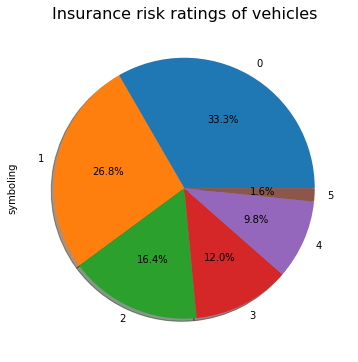

In [319]:
cars = df["symboling"].value_counts() 

fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)

df['symboling'].value_counts().plot.pie(labels=df.index,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Insurance risk ratings of vehicles', fontsize=16)
plt.savefig('Images/symboling_dist_pie.png', bbox_inches='tight')

In [320]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky,avg-mpg,price-slab
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,30,13950.0,4,4,1786,0.043646,risky,1,27.0,10000-20000
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,22,17450.0,4,5,2228,0.040722,risky,1,20.0,10000-20000


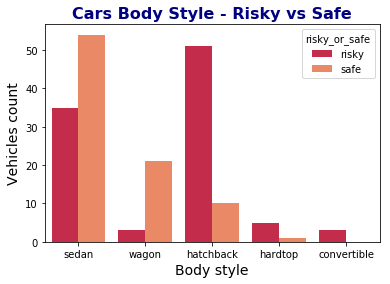

In [326]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Cars Body Style - Risky vs Safe", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=df, x="body-style", hue="risky_or_safe", ax=ax, palette=[plot_color, plot_alt_color])
# sns.barplot(data=cars_by_price_slab, x="price-slab", y="cars-count", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Body style', fontsize=14)

fig.savefig('Images/cars_bodystyle_risky_vs_safe_count.png',dpi=fig.dpi,bbox_inches='tight')



In [337]:
cars = pd.pivot_table(df,index=['body-style','risky_or_safe'], values='is_risky',  aggfunc='count').sort_values(by=['is_risky'], ascending=False)
cars.reset_index(inplace=True)
cars

,body-style,risky_or_safe,is_risky
0,sedan,safe,54
1,hatchback,risky,51
2,sedan,risky,35
3,wagon,safe,21
4,hatchback,safe,10
5,hardtop,risky,5
6,convertible,risky,3
7,wagon,risky,3
8,hardtop,safe,1


In [341]:
cars[cars['risky_or_safe'] == "safe"]

,body-style,risky_or_safe,is_risky
0,sedan,safe,54
3,wagon,safe,21
4,hatchback,safe,10
8,hardtop,safe,1


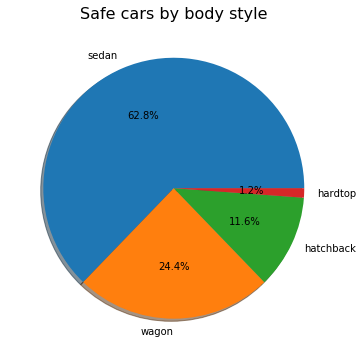

In [351]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
safe_cars = cars[cars['risky_or_safe'] == "safe"]
plt.pie(safe_cars['is_risky'],
        labels=safe_cars["body-style"],
        shadow= True,
        autopct='%1.1f%%')

plt.title('Safe cars by body style', fontsize=16)

plt.savefig('Images/safe_cars_by_bodystyle_pie.png', bbox_inches='tight')


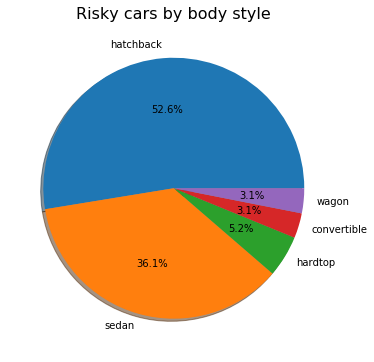

In [352]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
risky_cars = cars[cars['risky_or_safe'] == "risky"]
plt.pie(risky_cars['is_risky'],
        labels=risky_cars["body-style"],
        shadow= True,
        autopct='%1.1f%%')

plt.title('Risky cars by body style', fontsize=16)

plt.savefig('Images/risky_cars_by_bodystyle.png', bbox_inches='tight')

#### Summary:

* Toyota sells highest number of cars followed by Nissan in brand category.
* Sedan segment sells highest number of cars with 48%  followed by hatchback.
* Cars under 10k lead the list with highest number of selling followed by Cars in between $10k to $20k on price range basis.